In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist


In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train = X_train.reshape(60000,28,28,1) 
X_test = X_test.reshape(10000,28,28,1)

In [25]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [26]:
model = Sequential([
            Input(shape = (28,28,1), name = 'input_layer'),
            Conv2D(32,kernel_size=3, activation= 'relu', name = 'cov_layer1' ),
            #Dropout(0.5) 데이터 기반한 weight를 줄여 오버핏팅을 줄이는 것
            MaxPooling2D(pool_size= 2), 
            Flatten(), 
            Dense(10, activation= 'softmax', name = '')
            ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cov_layer1 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
  (Dense)                    (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=10, epochs = 10)

Epoch 1/10
6000/6000 [==============================] - 54s 9ms/step - loss: 0.4096 - accuracy: 0.9449 - val_loss: 0.1126 - val_accuracy: 0.9681
Epoch 2/10
6000/6000 [==============================] - 54s 9ms/step - loss: 0.1064 - accuracy: 0.9683 - val_loss: 0.1083 - val_accuracy: 0.9687
Epoch 3/10
6000/6000 [==============================] - 56s 9ms/step - loss: 0.0833 - accuracy: 0.9755 - val_loss: 0.1181 - val_accuracy: 0.9736
Epoch 4/10
6000/6000 [==============================] - 55s 9ms/step - loss: 0.0758 - accuracy: 0.9774 - val_loss: 0.1557 - val_accuracy: 0.9601
Epoch 5/10
6000/6000 [==============================] - 54s 9ms/step - loss: 0.0647 - accuracy: 0.9809 - val_loss: 0.1550 - val_accuracy: 0.9701
Epoch 6/10
6000/6000 [==============================] - 55s 9ms/step - loss: 0.0597 - accuracy: 0.9836 - val_loss: 0.1957 - val_accuracy: 0.9731
Epoch 7/10
6000/6000 [==============================] - 54s 9ms/step - loss: 0.0548 - accuracy: 0.9851 - val_loss: 0.1847 - val_ac

In [20]:
def predict_image_sample_(model, X_test, y_test, test_id=-1):
    if test_id < 0:
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
        
    test_image = X_test[test_sample_id]
    
    #plt.imshow(test_image, cmap='gray')
    
    test_image = test_image.reshape(1,28,28,1)

    y_actual = y_test[test_sample_id]
    print("y_actual number=", y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred=", y_pred)
    y_pred_num = np.argmax(y_pred, axis=1)[0]
    print("y_pred number=", y_pred_num)
    
    return y_actual, y_pred_num

y_actual number= 7
1/1 [==============================] - 0s 12ms/step
y_pred= [[5.3256926e-22 5.8424848e-29 5.7774586e-14 2.6506371e-15 5.9835792e-33
  2.2073040e-28 1.3745883e-28 1.0000000e+00 3.2396904e-19 3.9532681e-14]]
y_pred number= 7
y_actual number= 2
1/1 [==============================] - 0s 13ms/step
y_pred= [[9.97940286e-10 1.03424945e-13 9.99998927e-01 7.44914373e-12
  2.19336939e-27 3.51156305e-21 1.01592457e-06 2.98504135e-26
  3.73173310e-18 1.06653012e-29]]
y_pred number= 2
y_actual number= 1
1/1 [==============================] - 0s 12ms/step
y_pred= [[7.2203739e-13 1.0000000e+00 2.2069660e-14 5.5963194e-18 3.5184594e-13
  1.9132227e-21 2.3406061e-16 2.1564516e-13 6.1062067e-10 2.1846518e-14]]
y_pred number= 1
y_actual number= 0
1/1 [==============================] - 0s 13ms/step
y_pred= [[1.0000000e+00 9.9481978e-27 2.3822937e-17 9.2451283e-25 6.2794280e-25
  5.0271226e-25 1.9764529e-17 9.6406406e-22 7.5398655e-19 4.3561973e-15]]
y_pred number= 0
y_actual number= 4
1

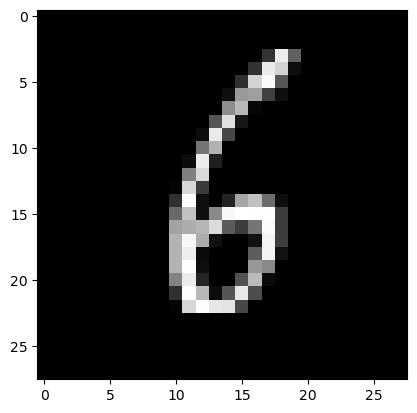

In [21]:
all, n = 0,0
(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(500):
    all +=1
    y_actual, y_pred_num = predict_image_sample_(model, X_test, y_test, test_id= i)
    if y_actual == y_pred_num:
        n += 1 
    else : pass
print(f'총횟수 = {all} , 맞춘횟수={n} , 정확도(Accuracy)={(n/all)*100}')

In [28]:
def predict_image_sample_(model, X_test, y_test, test_id=-1):
    if test_id < 0:
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
        
    test_image = X_test[test_sample_id]
    
    #plt.imshow(test_image, cmap='gray')
    
    test_image = test_image.reshape(1,28,28,1)

    y_actual = y_test[test_sample_id]
    print("y_actual number=", y_actual)
    
    y_pred = model.predict(test_image)
    #print("y_pred=", y_pred)
    y_pred_num = np.argmax(y_pred, axis=1)[0]
    print("y_pred number=", y_pred_num)
    
    return y_actual, y_pred_num

In [29]:
all, n = 0,0
(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(500):
    all +=1
    y_actual, y_pred_num = predict_image_sample_(model, X_test, y_test, test_id= i)
    if y_actual == y_pred_num:
        n += 1 
    else : pass
print(f'총횟수 = {all} , 맞춘횟수={n} , 정확도(Accuracy)={(n/all)*100}')

y_actual number= 7
1/1 [==============================] - 0s 35ms/step
y_pred number= 7
y_actual number= 2
1/1 [==============================] - 0s 11ms/step
y_pred number= 2
y_actual number= 1
1/1 [==============================] - 0s 11ms/step
y_pred number= 1
y_actual number= 0
1/1 [==============================] - 0s 11ms/step
y_pred number= 0
y_actual number= 4
1/1 [==============================] - 0s 11ms/step
y_pred number= 4
y_actual number= 1
1/1 [==============================] - 0s 12ms/step
y_pred number= 1
y_actual number= 4
1/1 [==============================] - 0s 11ms/step
y_pred number= 4
y_actual number= 9
1/1 [==============================] - 0s 12ms/step
y_pred number= 9
y_actual number= 5
1/1 [==============================] - 0s 11ms/step
y_pred number= 5
y_actual number= 9
1/1 [==============================] - 0s 11ms/step
y_pred number= 9
y_actual number= 0
1/1 [==============================] - 0s 12ms/step
y_pred number= 0
y_actual number= 6
1/1 [========